In [2]:
import pandas as pd
import os

In [3]:
EthDaily = os.path.join('Resources/EthDaily.csv')
ETHd_df = pd.read_csv(EthDaily)
ETHd_df

,Date,Price,Open,High,Low,Vol.,Change %
0,7-Mar-23,"1,575.30","1,565.84","1,575.80","1,561.91",307.71K,0.60%
1,6-Mar-23,"1,565.84","1,564.36","1,581.13","1,555.43",322.16K,0.09%
2,5-Mar-23,"1,564.37","1,566.73","1,587.95","1,556.84",313.01K,-0.15%
3,4-Mar-23,"1,566.73","1,569.45","1,577.02","1,550.10",247.02K,-0.14%
4,3-Mar-23,"1,568.89","1,647.86","1,649.19","1,547.61",783.74K,-4.76%
...,...,...,...,...,...,...,...
791,5-Jan-21,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%
792,4-Jan-21,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%
793,3-Jan-21,974.97,774.54,"1,008.49",769.57,4.02M,25.88%
794,2-Jan-21,774.5,729,787.26,715.15,2.25M,6.22%


In [4]:
ETHd_df['Date'] = pd.to_datetime(ETHd_df['Date'])
ETHd_df['Day'] = ETHd_df['Date'].dt.day_name()
ETHd_df

,Date,Price,Open,High,Low,Vol.,Change %,Day
0,2023-03-07,"1,575.30","1,565.84","1,575.80","1,561.91",307.71K,0.60%,Tuesday
1,2023-03-06,"1,565.84","1,564.36","1,581.13","1,555.43",322.16K,0.09%,Monday
2,2023-03-05,"1,564.37","1,566.73","1,587.95","1,556.84",313.01K,-0.15%,Sunday
3,2023-03-04,"1,566.73","1,569.45","1,577.02","1,550.10",247.02K,-0.14%,Saturday
4,2023-03-03,"1,568.89","1,647.86","1,649.19","1,547.61",783.74K,-4.76%,Friday
...,...,...,...,...,...,...,...,...
791,2021-01-05,"1,099.52","1,042.48","1,131.56",976.91,3.25M,5.48%,Tuesday
792,2021-01-04,"1,042.40",977.76,"1,158.27",894.24,5.19M,6.92%,Monday
793,2021-01-03,974.97,774.54,"1,008.49",769.57,4.02M,25.88%,Sunday
794,2021-01-02,774.5,729,787.26,715.15,2.25M,6.22%,Saturday


In [5]:
ETHd_df.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
Day                 object
dtype: object

In [7]:
#convert revenue column to float
ETHd_df['Price'] = ETHd_df['Price'].apply(lambda x: float(x.split()[0].replace(',', '')))

#view updated DataFrame
print(ETHd_df)
ETHd_df['Price'] = ETHd_df['Price'].astype(float)

          Date    Price      Open      High       Low     Vol. Change %  \
0   2023-03-07  1575.30  1,565.84  1,575.80  1,561.91  307.71K    0.60%   
1   2023-03-06  1565.84  1,564.36  1,581.13  1,555.43  322.16K    0.09%   
2   2023-03-05  1564.37  1,566.73  1,587.95  1,556.84  313.01K   -0.15%   
3   2023-03-04  1566.73  1,569.45  1,577.02  1,550.10  247.02K   -0.14%   
4   2023-03-03  1568.89  1,647.86  1,649.19  1,547.61  783.74K   -4.76%   
..         ...      ...       ...       ...       ...      ...      ...   
791 2021-01-05  1099.52  1,042.48  1,131.56    976.91    3.25M    5.48%   
792 2021-01-04  1042.40    977.76  1,158.27    894.24    5.19M    6.92%   
793 2021-01-03   974.97    774.54  1,008.49    769.57    4.02M   25.88%   
794 2021-01-02   774.50       729    787.26    715.15    2.25M    6.22%   
795 2021-01-01   729.12    735.87    748.96    715.74    1.64M   -0.93%   

          Day  
0     Tuesday  
1      Monday  
2      Sunday  
3    Saturday  
4      Friday  
.. 

In [8]:
ETHd_df.dtypes


Date        datetime64[ns]
Price              float64
Open                object
High                object
Low                 object
Vol.                object
Change %            object
Day                 object
dtype: object

In [9]:
for column in ETHd_df.columns:
    print(f"Column {column} has {ETHd_df[column].isnull().sum()}null values")

Column Date has 0null values
Column Price has 0null values
Column Open has 0null values
Column High has 0null values
Column Low has 0null values
Column Vol. has 0null values
Column Change % has 0null values
Column Day has 0null values


In [10]:
# Remove customer ID column
ETHd_df.drop(columns=["Open", "High", "Low", "Vol.", "Change %", "Date"], inplace=True)
ETHd_df.head()


,Price,Day
0,1575.30,Tuesday
1,1565.84,Monday
2,1564.37,Sunday
3,1566.73,Saturday
4,1568.89,Friday


In [16]:
ETHDay_df = ETHd_df.groupby(by='Day').mean()
ETHDay_df

,Price
Day,
Friday,2297.676930
Monday,2310.106140
Saturday,2303.481316
Sunday,2308.330965
Thursday,2324.017080
Tuesday,2313.227193
Wednesday,2332.886018


In [17]:
# Saving cleaned data
file_path = "Resources/ETHDay.csv"
ETHd_df.to_csv(file_path, index=False)

In [18]:
import matplotlib.pyplot as plt

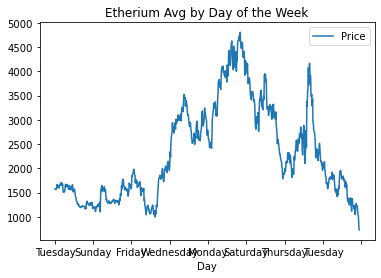

In [19]:
ETHd_df.plot ("Day","Price")
x = ('Day')
y= ('Price')
plt.title("Etherium Avg by Day of the Week")
plt.show()